In [27]:
import pandas as pd
from pyhere import here
import matplotlib.pyplot as plt

In [2]:
!ls

Assignment 1.docx
Assingment 2.docx
M2 - W4 Assignment: Advanced OOP strategies.py
M2 Project: Presenting Data to Different Teams.ipynb
M2-W3.ipynb
M3 - W1 Familiarise yourself with the pandas package.ipynb
Module 2 Reflection.docx
assignment 3 Saad Rehman.docx
assignment 5.ipynb
assignment4.ipynb
time_decorator.py


In [81]:
!pwd

/Users/apple/Desktop/amsterdam_tech


In [3]:
# I wonder why do I need to give it full path to the file.
df=pd.read_csv(here("Desktop","amsterdam_tech","data_sets","METABRIC_RNA_Mutation.csv"))
df.head()

/var/folders/z6/8ljjr55d7sz134qq90v8c1xh0000gp/T/ipykernel_64986/2070933347.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(here("Desktop","amsterdam_tech","data_sets","METABRIC_RNA_Mutation.csv"))


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [132]:
columns=df.columns
def find_col(cols:list,col_name):
    for col in cols:
        #print (col)
        if col.startswith(col_name):
            return col
print (find_col(cols=columns,col_name="fox"))

foxo1


In [294]:
df.columns[:50]

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten',
       'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1',
       'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d'],
      dtype='object')

### <span style="color:green">Calculate mean tumour size of patients grouped by vital status and tumour stage</span>




In [7]:
df.groupby(['overall_survival','tumor_stage'])['tumor_size'].mean()

overall_survival  tumor_stage
0                 0.0            65.000000
                  1.0            18.376744
                  2.0            28.981328
                  3.0            48.523810
                  4.0            34.375000
1                 0.0            23.000000
                  1.0            16.588462
                  2.0            25.435535
                  3.0            47.379310
                  4.0            35.000000
Name: tumor_size, dtype: float64

### <span style="color:green">Find the cohort of patients and tumour stage where the average expression of genes TP53 and FOXA1 is the highest</span>



I am not sure what you mean by "average expression". But I will try to average the values of both and then use them for my max func and also I will process them separately

In [9]:
df['avg_tp_fo']=(df['tp53']+df['foxo1'])/2
df['avg_tp_fo']

0       1.45055
1      -0.36580
2       0.03385
3       1.04160
4      -0.41235
         ...   
1899    0.64320
1900   -0.40215
1901   -0.21425
1902   -0.00055
1903    0.16540
Name: avg_tp_fo, Length: 1904, dtype: float64

In [20]:
df.groupby(['cohort','tumor_stage'])['avg_tp_fo'].max()

cohort  tumor_stage
1.0     0.0            0.28715
        1.0            2.15180
        2.0            1.60250
        3.0            1.66295
        4.0            0.92425
2.0     1.0            2.71945
        2.0            1.66820
        3.0            1.10585
3.0     1.0            2.00355
        2.0            2.19150
        3.0            1.18340
5.0     1.0            1.04230
        2.0            0.97720
        3.0            0.84885
Name: avg_tp_fo, dtype: float64

In [26]:
#the cohort and tumor stage of person where avg of both is max
value=df.groupby(['cohort', 'tumor_stage'])['avg_tp_fo'].max().idxmax()
max_tp_fo=df['avg_tp_fo'].max()
print (f'At the max of average value of tp53 and foxo1 of {max_tp_fo}, the  cohort is {value[0]} and tumor stage is {value[1]}')

At the max of average value of tp53 and foxo1 of 2.71945, the  cohort is 2.0 and tumor stage is 1.0


In [17]:

df.groupby(['cohort','tumor_stage'])[['tp53','foxo1']].max()


tp53   foxo1
cohort tumor_stage                
1.0    0.0          1.1334  1.4860
       1.0          2.7826  3.1306
       2.0          3.5619  3.2559
       3.0          1.9870  2.5328
       4.0          1.5008  1.0792
2.0    1.0          2.4120  4.6032
       2.0          1.4308  2.1761
       3.0          1.6930  2.3643
3.0    1.0          2.8612  2.5889
       2.0          3.9126  3.1815
       3.0          2.6164  2.1175
5.0    1.0          1.0178  1.5899
       2.0          2.1460  1.5944
       3.0         -0.0660  1.7637

In [ ]:
#This gives the cohort and tumor stage where typ53 and foxo1 is max
df.groupby(['cohort', 'tumor_stage'])[['tp53', 'foxo1']].max().idxmax()

tp53     (3.0, 2.0)
foxo1    (2.0, 1.0)
dtype: object

### <span style="color:green">Do patients with greater tumour size live longer? How about patients with greater tumour stage? How about greater Nottingham_prognostic_index?</span>




In [31]:
df.groupby(['tumor_size'])['overall_survival_months'].mean().reset_index()


,tumor_size,overall_survival_months
0,1.00,181.400000
1,2.00,129.344444
2,2.12,177.600000
3,2.30,146.833333
4,3.00,56.700000
...,...,...
106,130.00,50.766667
107,150.00,39.166667
108,160.00,18.933333
109,180.00,96.900000


<Axes: title={'center': 'Average overall survival by tumor size'}, xlabel='overall_survival', ylabel='tumor_size'>

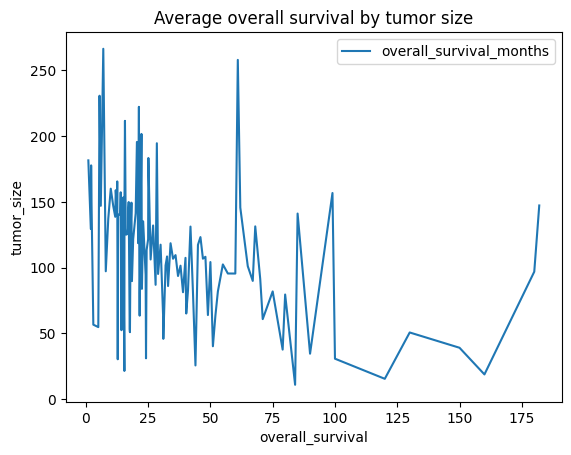

In [30]:
df.groupby(['tumor_size'])['overall_survival_months'].mean().reset_index().plot(y='overall_survival_months',x='tumor_size',kind='line',xlabel='overall_survival',ylabel='tumor_size',title='Average overall survival by tumor size')

There appears to be few outliers which is disturbing the trend. But apparently there seeems to be a negative relation between the two, lets confirm this using corr

In [382]:

mean=df.groupby(['tumor_size'])['overall_survival_months'].mean().reset_index().sort_values(by='overall_survival_months',ascending=False)

In [381]:
mean['overall_survival_months'].corr(mean['tumor_size'])


-0.35569687481891527

Based on the value there is a moderate negative correlation between the two variables.

now lets check for tumor stage

<Axes: title={'center': 'Average overall survival by tumor stage'}, xlabel='overall_survival', ylabel='tumor_stage'>

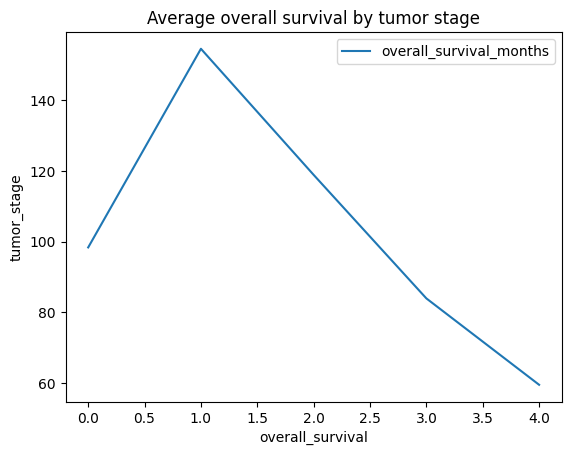

In [384]:
df.groupby(['tumor_stage'])['overall_survival_months'].mean().reset_index().plot(y='overall_survival_months',x='tumor_stage',kind='line',xlabel='overall_survival',ylabel='tumor_stage',title='Average overall survival by tumor stage')

In [386]:
t_stage=df.groupby(['tumor_stage'])['overall_survival_months'].mean().reset_index()
t_stage


,tumor_stage,overall_survival_months
0,0.0,98.358333
1,1.0,154.595649
2,2.0,118.897667
3,3.0,83.922899
4,4.0,59.470370


In [387]:
t_stage['overall_survival_months'].corr(t_stage['tumor_stage'])

-0.6512946649470279

A very strong inverse correlation between the two variables.

Now lets check for Nottingham_prognostic_index

<Axes: title={'center': 'Average overall survival by nottingham_prognostic_index'}, xlabel='overall_survival', ylabel='nottingham_prognostic_index'>

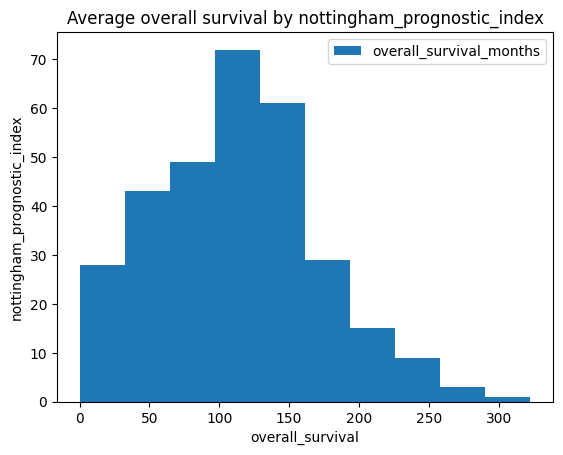

In [391]:
df.groupby(['nottingham_prognostic_index'])['overall_survival_months'].mean().reset_index().plot(y='overall_survival_months',x='nottingham_prognostic_index',kind='hist',xlabel='overall_survival',ylabel='nottingham_prognostic_index',title='Average overall survival by nottingham_prognostic_index')

In [392]:
npi=df.groupby(['nottingham_prognostic_index'])['overall_survival_months'].mean().reset_index()
npi

,nottingham_prognostic_index,overall_survival_months
0,1.000,0.000000
1,1.020,146.833333
2,1.022,27.400000
3,1.024,234.616667
4,1.028,164.700000
...,...,...
305,6.240,15.600000
306,6.260,50.766667
307,6.300,39.166667
308,6.320,18.933333


In [393]:
npi['nottingham_prognostic_index'].corr(npi['overall_survival_months'])

-0.39952474489931233

Based on the value there is a moderate negative correlation between the two variables.

### <span style="color:green">Which columns of the metabric dataset have missing data??</span>

In [413]:


missing_data=df.isnull().sum()
missing_data[missing_data > 0]

type_of_breast_surgery             22
cancer_type_detailed               15
cellularity                        54
er_status_measured_by_ihc          30
neoplasm_histologic_grade          72
tumor_other_histologic_subtype     15
primary_tumor_laterality          106
mutation_count                     45
oncotree_code                      15
3-gene_classifier_subtype         204
tumor_size                         20
tumor_stage                       501
death_from_cancer                   1
dtype: int64

### <span style="color:green">Find the patients ids who have missing tumour size or missing mutation count data. Which cohorts do they belong to???</span>

In [411]:


missing_patient_id = df[df['tumor_size'].isnull() | df['mutation_count'].isnull()]['patient_id']

cohorts_of_missing_data = df.loc[df['patient_id'].isin(missing_patient_id), 'cohort']

result_df = pd.DataFrame({'Patient_ID': missing_patient_id, 'Cohort': cohorts_of_missing_data})
print(result_df)


      Patient_ID  Cohort
0              0     1.0
12            45     1.0
14            48     1.0
15            50     1.0
16            53     1.0
...          ...     ...
1568        6141     5.0
1580        6160     5.0
1609        6217     5.0
1620        6234     5.0
1635        6272     5.0

[65 rows x 2 columns]
